## MaxCut demo

1. Load the Maxcut class and define the graph.

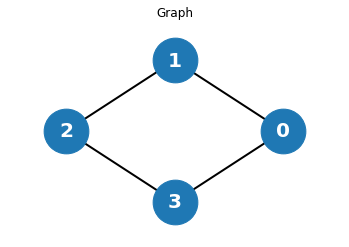

In [1]:
from QuICT.algorithm.quantum_machine_learning.VQA.QAOA import MaxCut

n = 4
edges = [(0, 1), (1, 2), (2, 3), (3, 0)]
maxcut = MaxCut(n, edges)
maxcut.draw_graph()

2. start training

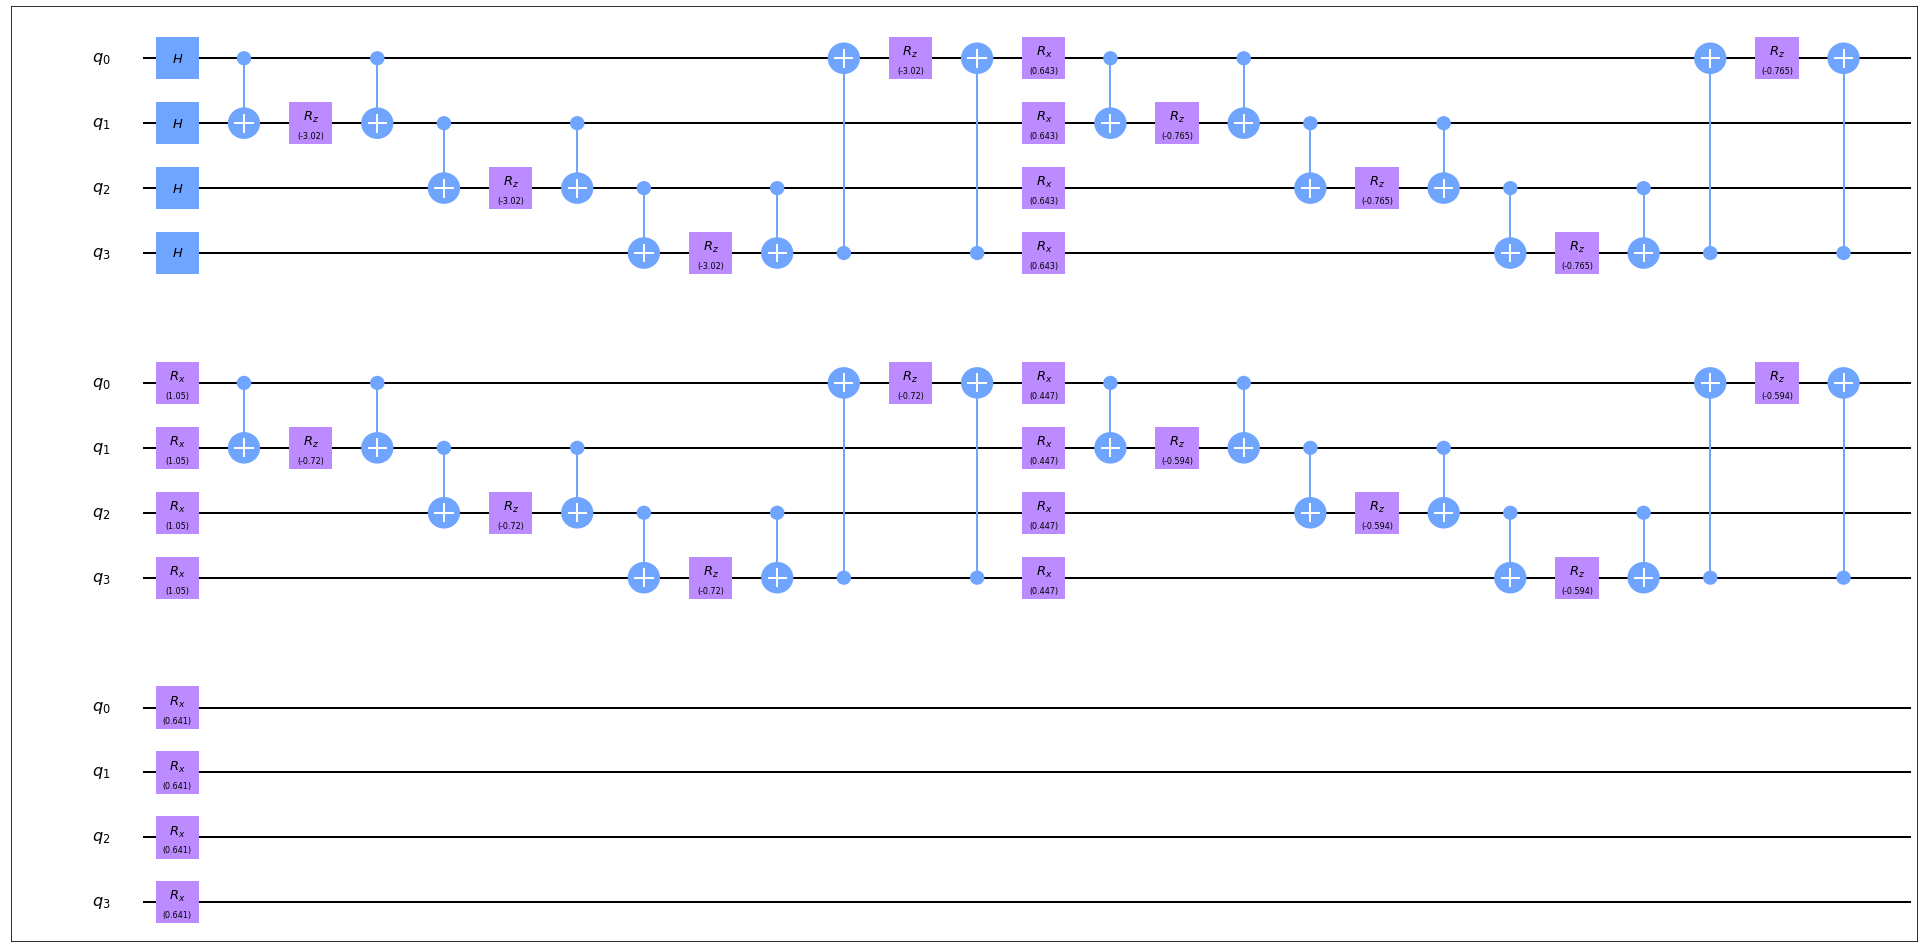

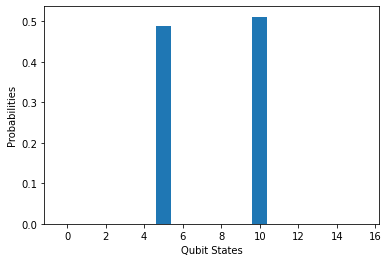

In [2]:
# Training
max_cut_num, cut_edges = maxcut.solve_maxcut(
    p=4,
    max_iters=100,
    lr=0.1,
    plot_prob=True,
    draw_circuit=True,
    save_model=True
)

3. Print the results.

Max cut: 4
Cut edges: [(0, 1), (0, 3), (1, 2), (2, 3)]


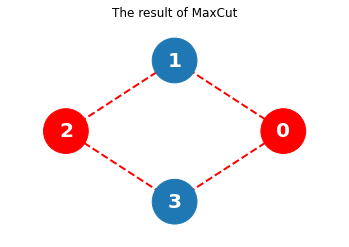

In [4]:
print("Max cut: {}".format(max_cut_num))
print("Cut edges: {}".format(cut_edges))
maxcut.draw_result()

## Solve for the largest eigenvalue of any Hamiltonian

1. Get Hamiltonian from randomly generated Pauli string.

In [3]:

import numpy as np
import torch
from QuICT.algorithm.quantum_machine_learning.VQA.QAOA.qaoa import QAOA
from QuICT.algorithm.quantum_machine_learning.utils.hamiltonian import Hamiltonian


def random_pauli_str(n_items, n_qubits):
    pauli_str = []
    coeffs = np.random.rand(n_items)
    for i in range(n_items):
        pauli = [coeffs[i]]
        for qid in range(n_qubits):
            flag = np.random.randint(0, 5)
            if flag == 0:
                pauli.append("X" + str(qid))
            elif flag == 1:
                pauli.append("Y" + str(qid))
            elif flag == 2:
                pauli.append("Z" + str(qid))
            elif flag == 3:
                pauli.append("I" + str(qid))
            elif flag == 4:
                continue
        pauli_str.append(pauli)
    return pauli_str

n_items = 3
n_qubits = 5
pauli_list = random_pauli_str(n_items, n_qubits)
pauli_list = [[0.7746049942682166, 'Z0', 'Y3', 'X3']]
# [[0.15603237671232995, 'I0', 'Y1', 'Y2', 'I3', 'I4'], [0.21790241683735379, 'X0', 'Y1', 'Z2', 'Z3', 'Z4'], [0.7876285520126287, 'X2', 'Y3', 'I4']]
print(pauli_list)
hamiltonian = Hamiltonian(pauli_list)
print(hamiltonian._pauli_str)

[[0.7746049942682166, 'Z0', 'Y3', 'X3']]


AssertionError: Each Pauli Gate should act on different qubits.

2. Start QAOANet and train

In [2]:
qaoa = QAOA(n_qubits, p=12, hamiltonian=hamiltonian)
hamiltonian_matrix = hamiltonian.get_hamiton_matrix(n_qubits)
eigens = np.linalg.eig(hamiltonian_matrix)
max_eigen = np.real(eigens[0][np.argmax(eigens[0])])
print("Max Eigen: ", max_eigen)

state = qaoa.train(optimizer="Adam", lr=0.1, max_iters=150, save_model=True)
# model_path = "/home/zoker/quict/QAOA_model_2022-10-13-15_48_03"
expect = -qaoa.net.loss_func(state)
print("Expect: ", expect)
# 1.6295



Max Eigen:  1.2384825998137552


Expect:  tensor(1.2385, device='cuda:0', dtype=torch.float64, grad_fn=<NegBackward0>)
